[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.  Zeitreihen-Transformation



(source: https://www.math.umd.edu/~petersd/666/html/cossin_example.html)

FLUCCOplus

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.transform as traffo

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


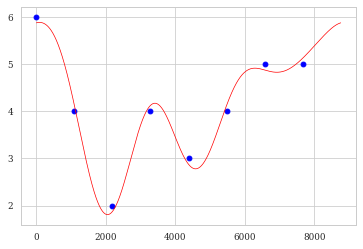

In [4]:
# define timeframe (of periodicity) of scaler
h = 8760 #hours of periodic timeframe

p = np.array([6,4,2,4,3,4,5,5])
s_year = traffo.transform(p)

def plot(timeseries, supports, h=8760,):
    x = np.arange(0, h, h/len(supports))
    xh = np.arange(0,h,1)
    plt.plot(x, supports, "bo")
    plt.plot(xh, timeseries, "r")
plot(s_year, p)

ok, wie siehts aus mit anderen timeframes? Tagesmodulation?

8760

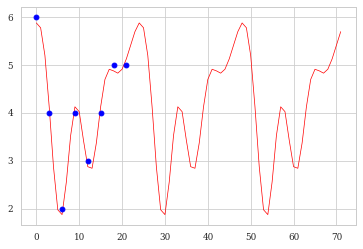

In [5]:
hscale = 24
p_day = np.array([6,4,2,4,3,4,5,5])
day = traffo.transform(p_day, hour_scale=hscale)

x = np.arange(0, hscale, hscale/len(p_day))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*3], day[:hscale*3], "r")
plt.plot(x[:hscale*3], p_day[:hscale*3], "bo")
len(day)

Wochenweise?

In [6]:
hscale = 168 # 7*24
8760 % 168

24

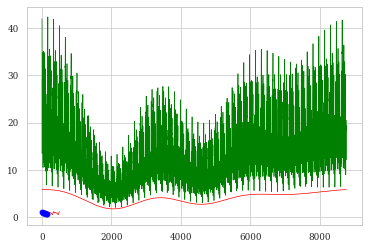

In [7]:
p_week = np.array([1.2,1,1,1,0.9,0.7,0.7])
week = traffo.transform(p_week, hour_scale=hscale)

x = np.arange(0, hscale, hscale/len(p_week))
xh = np.arange(0,8760,1)

plt.plot(xh[:hscale*3], week[:hscale*3], "r")
plt.plot(x[:hscale*3], p_week[:hscale*3], "bo")
len(week)

example = week * day * s_year
plt.plot(xh, example, "g")
plt.plot(xh, s_year, "r-")

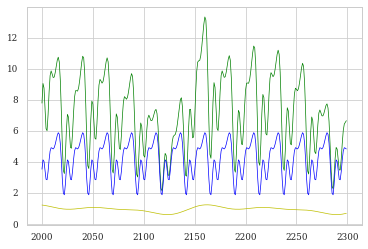

In [8]:
a,b = 2000, 2300
plt.plot(xh[a:b], example[a:b], "g")
plt.plot(xh[a:b], day[a:b], "b-")
plt.plot(xh[a:b], week[a:b], "y-")

Das scheint soweit zu funktionieren.

Ein Signal soll nun mehreren dieser Transformationen unterworfen werden können.
So kann eingestellt werden, wie sich der typische Tag der PV Produktion ändert,
wenn beispielsweise hauptsächlich Ost-West Anlagen mit typisch breiteren,
aber insgesamt niedrigeren Tagesprofilen modelliert werden sollen.
Ebenso der Strombedarf kann sowohl saisonal, als auch im Stundenmittel eines typischen Tags
 angepasst werden.

Dazu müssen lediglich die entsprechenden Skalierungsprofile aufmultipliziert werden
und das resultierende Signal normiert beziehungsweise auf die jährliche Zielgröße hin skaliert werden:



## Dashboard

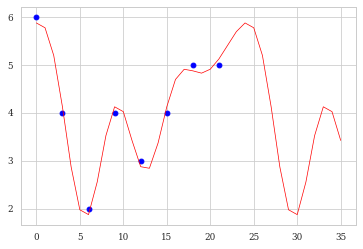

In [9]:
import panel as pn
import panel.widgets as pnw
from matplotlib.figure import Figure


def scaler_plot(scaler, support_points, hour_scale, view_scale=1.5):
    p, h = support_points, hour_scale

    x = np.arange(0, h, h/len(p))
    xh = np.arange(0,8760,1)

    fig = Figure()
    ax = fig.add_subplot()
    a, b = 0, int(h*view_scale)
    ax.plot(x[a:b], p[a:b], "bo")
    ax.plot(xh[a:b], scaler[a:b], "r")
    return fig

scaler_plot(day,p_day, 24)

In [10]:
# a number of sliders
N = 12
points = [pnw.FloatSlider(name='', value=1.0, start=0., end=3., step=0.05) for i in range(N)]

print(points)

[FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0), FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)]


Row
    [0] Column
        [0] Column
            [0] Markdown(str)
        [1] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [2] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [3] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [4] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [5] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [6] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [7] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [8] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [9] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [10] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [11] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
        [12] FloatSlider(end=3.0, step=0.05, value=1.0, value_throttled=1.0)
    [1] ParamFunction(function)
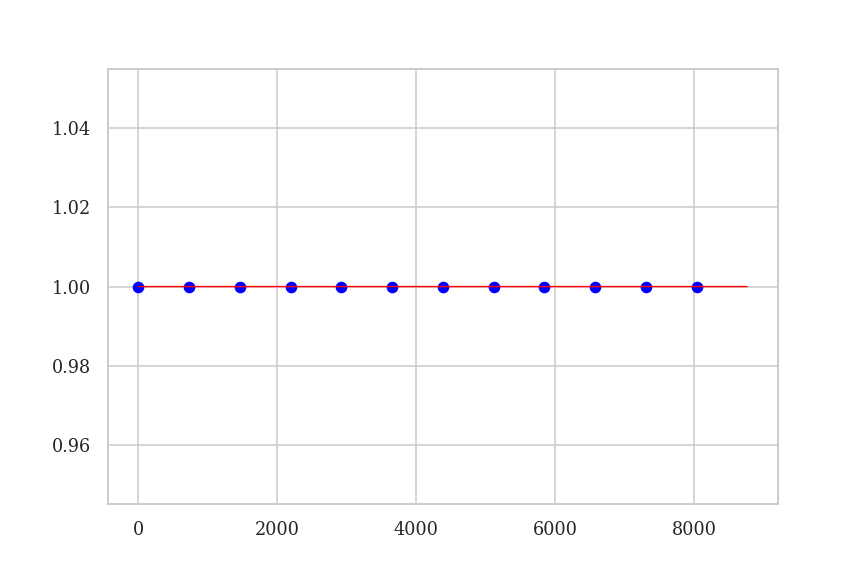

In [11]:
@pn.depends(*points)
def reactive_scalar(*points):
    p = [*points]
    s = traffo.transform(p)
    return scaler_plot(s, points, 8760)

widgets   = pn.Column("<br>\n# Reactive Scaler")
sliders = pn.Column(widgets, *points)
dashboard = pn.Row(sliders, reactive_scalar)

pn.extension()
pn.interact()
dashboard


Die Stützstellen lassen sich dynamisch festlegen und die resultierenden Profile anzeigen